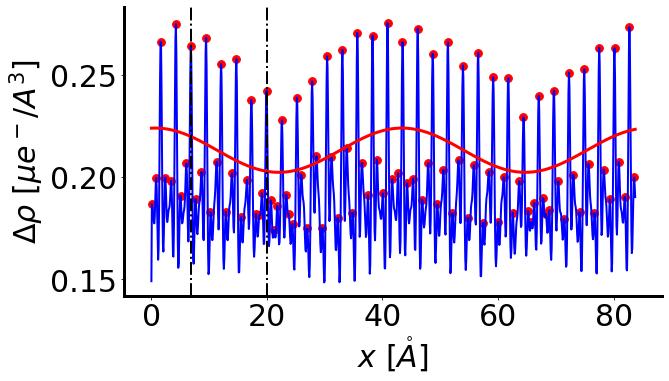

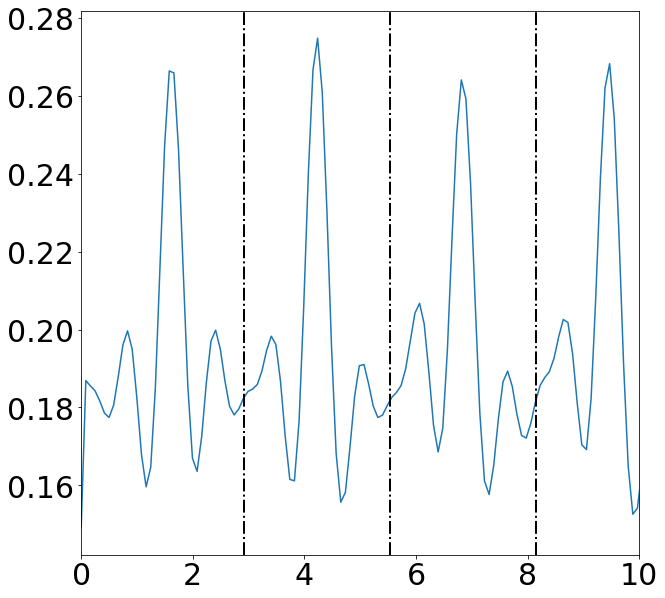

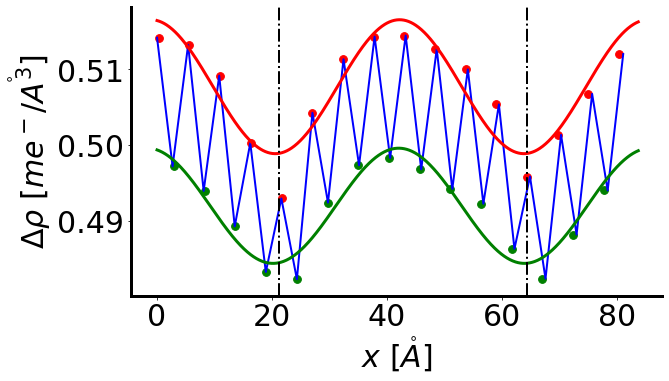

In [161]:
import matplotlib.pyplot as plt
import numpy
import scipy.optimize
import scipy.fftpack


cut_high = 0
cut_low = 100

charge_diff = numpy.loadtxt('vplanar.txt')
charge_diff = charge_diff[:,1]

cell_length = 83.737472
cell_volume = cell_length * 10.468720 * 7.649663

x = numpy.linspace(0,  cell_length, len(charge_diff))

charge_diff /= cell_volume
charge_diff *= 1000

#find envelope points
env_high = numpy.empty(0)
x_env_high = numpy.empty(0)

for i, chg in enumerate(charge_diff):
    previ = i-1
    nexti = i+1
    if i == 0:
        previ = len(charge_diff)-1
    elif i == len(charge_diff)-1:
        nexti = 0
    if chg > charge_diff[previ] and chg > charge_diff[nexti] and chg >= cut_high:
        env_high = numpy.append(env_high, chg)
        x_env_high = numpy.append(x_env_high, x[i])
        
def env_sine(x, a, b, c, d):
    return a + b*numpy.sin(c*x + d)

#fit envelope points t sine curve
init = [125, 30, 0.1,  0]
popt, pcov = scipy.optimize.curve_fit(env_sine, x_env_high, env_high, p0=init)


#plot
plt.figure(1, figsize=[10,6])
plt.rcParams.update({'font.size': 30})

plt.plot(x, charge_diff, color='blue', linewidth=2)
plt.scatter(x_env_high, env_high, color='red', marker='o', s=60)
plt.plot(x, env_sine(x, *popt), color='red', linewidth=3)

plt.axvline(x=x_env_high[8],linewidth=2, color='k', linestyle='-.')
plt.axvline(x=x_env_high[24],linewidth=2, color='k', linestyle='-.')

plt.xlabel("$x \ [\mathring{A}]$", fontsize=30)
plt.ylabel(r"$\Delta\rho \ [\mu e^-/A^{3}]$", fontsize=30)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)


plt.tight_layout()
plt.savefig("DW_BB_charge.eps")


nuc = 32
dx = x[1]-x[0]
uc_length = cell_length/nuc

zero_shift=0.3

plt.figure(2, figsize=[10,10])
plt.plot(x, charge_diff)
for i in range(0,nuc):
    plt.axvline(x=(i+1)*uc_length+zero_shift,linewidth=2, color='k', linestyle='-.')
plt.xlim([0,10]) 


riemann_vec = numpy.empty(nuc)
for i in range(0, nuc):
    lim_min = i*uc_length+zero_shift
    lim_max = (i+1)*uc_length+zero_shift
    
    riemann_tot = 0

    for j, ix in enumerate(x[0:-1]):
        if ix >= lim_min and ix <= lim_max: 
            riemann_high = charge_diff[j+1]*dx
            riemann_low = charge_diff[j]*dx
            riemann = (riemann_high+riemann_low)/2
            riemann_tot += riemann
            
    riemann_vec[i] = riemann_tot
    
env_high = numpy.empty(0)
env_low = numpy.empty(0)
x_env_high = numpy.empty(0)
x_env_low = numpy.empty(0)

for i, chg in enumerate(riemann_vec):
    previ = i-1
    nexti = i+1
    if i == 0:
        previ = len(riemann_vec)-1
    elif i == len(riemann_vec)-1:
        nexti = 0
    if chg > riemann_vec[previ] and chg > riemann_vec[nexti] and chg >= cut_high:
        env_high = numpy.append(env_high, chg)
        x_env_high = numpy.append(x_env_high, i*uc_length+zero_shift)
    if chg < riemann_vec[previ] and chg < riemann_vec[nexti] and chg <= cut_low:
        env_low = numpy.append(env_low, chg)
        x_env_low = numpy.append(x_env_low, i*uc_length+zero_shift)
                  

#fit envelope points t sine curve
init = [125, 30, 0.1,  0]
popt_high, pcov = scipy.optimize.curve_fit(env_sine, x_env_high[0:-1], env_high[0:-1], p0=init)
popt_low, pcov = scipy.optimize.curve_fit(env_sine, x_env_low[0:-1], env_low[0:-1], p0=popt_high)



plt.figure(3, figsize=[10,6])
plt.rcParams.update({'font.size': 30})

plt.plot(numpy.linspace(0, (nuc-1)*uc_length, nuc-1), riemann_vec[0:-1], color='blue', linewidth=2)
plt.scatter(x_env_high*1.02, env_high, color='red', marker='o', s=60)
plt.scatter(x_env_low[0:-1]*1.02, env_low[0:-1], color='green', marker='o', s=60)
plt.plot(x, env_sine(x, *popt_high), color='red', linewidth=3)
plt.plot(x, env_sine(x, *popt_low), color='green', linewidth=3)


plt.xlabel("$x \ [\mathring{A}]$", fontsize=30)
plt.ylabel(r"$\Delta\rho \ [m e^-/\mathring{A^3}]$", fontsize=30)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)

plt.axvline(x=x_env_high[4],linewidth=2, color='k', linestyle='-.')
plt.axvline(x=x_env_high[12]*1.02,linewidth=2, color='k', linestyle='-.')


plt.tight_layout()
plt.savefig("DW_BB_charge.eps")

